### case study interface
- install vega for python if you haven't done so: `pip install vega`
- use light theme of notebook/lab to better see the visualization (most of them are transparent)

In [35]:
import pickle
import pprint
import json
import pandas
from vega import VegaLite

pp = pprint.PrettyPrinter(indent=4)

with open("./analysis.pkl", "rb") as f:
    dt = pickle.load(f)

In [4]:
# execute only if you are using JupyterLab
from IPython.display import display
import pandas as pd

def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

{   'correct': False,
    'dataset': 'vega-lite-example-gallery',
    'formula': '((reverse fb:row.row.university_farm) (fb:row.row.variety '
               'fb:cell_variety.manchuria))',
    'questionId': 'Q3f656ff7ef4be5aa04f2840c11ebe1ddc51aa657416aa5f788f900321d64',
    'runtimeFile': 'stacked_bar_h.csv',
    'specFile': 'stacked_bar_h.json',
    'systemAnswer': '53.9',
    'targetAnswer': 'Duluth',
    'visQuery': 'Manchuria yielded the least at what location ?'}


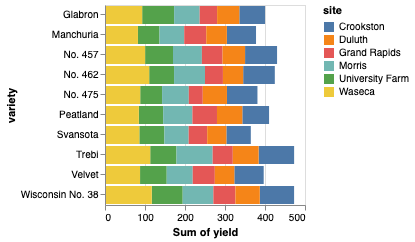

,variety,University Farm,Waseca,Morris,Crookston,Grand Rapids,Duluth
0,Manchuria,53.90000,82.33334,61.80000,72.90000,55.10000,51.53334
1,Glabron,79.86666,92.93333,63.90000,64.30000,43.56666,55.53334
2,Svansota,62.56667,85.83333,60.80000,61.10000,46.30000,47.93333
3,Velvet,66.70000,87.63333,64.96666,73.39999,55.26666,48.76667
4,Trebi,65.63333,113.06660,90.40000,88.76666,50.40000,64.53333
5,No. 457,69.70001,100.30000,72.23334,80.00000,51.63334,56.30000
6,No. 462,62.16667,110.46670,77.36667,79.09999,44.83334,50.60000
7,Peatland,60.83334,84.59999,73.06667,66.83333,61.46667,63.36667
8,No. 475,54.66667,88.03334,66.83333,76.23333,34.93333,60.43333
9,Wisconsin No. 38,77.30000,116.96667,76.63334,85.76667,55.13334,60.93333


In [39]:
# assign id
id = 303

# read & print json
curr_json = dt["data"][id]
pp.pprint(curr_json)

# print visualization
with open("./dataset/dataset/{}/specs/{}".format(curr_json["dataset"], curr_json["specFile"]), "r") as f:
    curr_vis = json.load(f)

# remap the location of the visualization
tmp = curr_vis["data"]["url"].split("/")
tmp[0] = "dataset/dataset"
curr_vis["data"]["url"] = "/".join(tmp)

# change default background to white
curr_vis["background"] = "white"

# draw the visualization
# use this for Jupyter Lab
Vega(curr_vis) 
# use this for Jupyter Notebook
# VegaLite(curr_vis) 

# draw the table extracted
pandas.read_csv("./analysis/{}/{}".format(curr_json["dataset"], curr_json["runtimeFile"]))